In [ ]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 
from pyhive import hive

In [ ]:
# Hive Connection
conn = hive.Connection(host="quickstart.cloudera", port=10000, username="cloudera" , database="default")

In [25]:
# Section 2 - Loading and Selecting Data

df = df1 = df2 = pd.read_sql("SELECT * FROM covid19", conn, parse_dates=['covid19.date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'Italy', 'China']
df = df[df['covid19.country'].isin(countries)]
df1 = df2 = df


In [26]:
# Section 3 - Creating a Summary Column

df['covid19.cases'] = df[['covid19.confirmed', 'covid19.recovered', 'covid19.deaths']].sum(axis=1)

In [27]:

# Section 4 - Restructuring our Data

df = df.pivot(index='covid19.date', columns='covid19.country', values='covid19.cases')
countries = list(df.columns)
covid = df.reset_index('covid19.date')
covid.set_index(['covid19.date'], inplace=True)
covid.columns = countries

In [28]:
# Section 5 - Calculating Rates per 100,000

populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'Italy':60480392, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

In [29]:
# Section 6 - Generating Colours and Style

colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'Italy':'#808585', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

Text(2020-01-23 00:00:00, 716772, 'For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths')

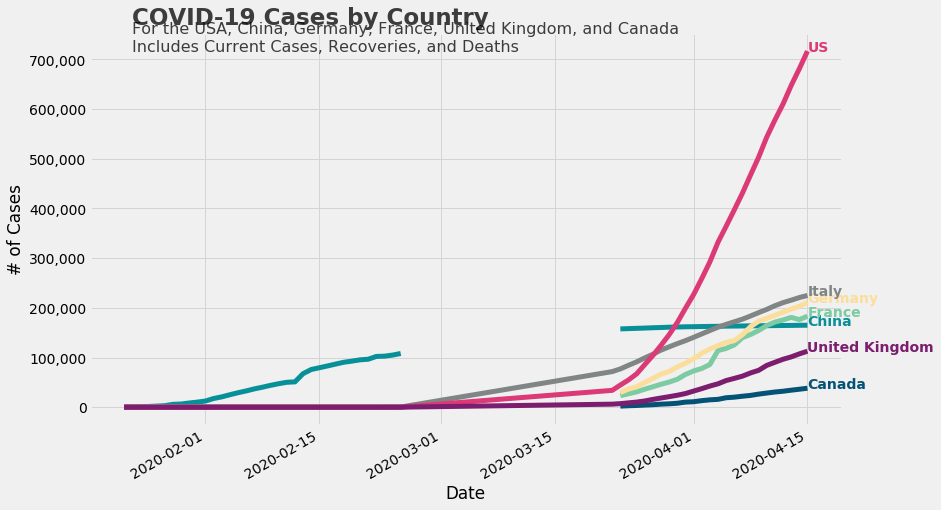

In [30]:
# Section 7 - Creating the Visualization

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels

plot.text(x = covid.index[1], y = int(covid.max().max())+1, s = "COVID-19 Cases by Country\n", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max()), s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)


Text(2020-01-23 00:00:00, 381.8428280028344, 'For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths')

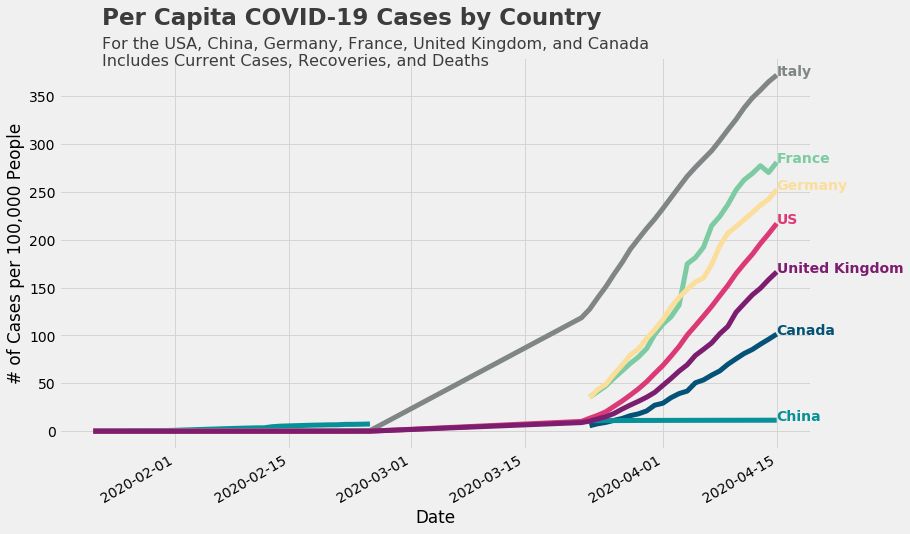

In [31]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country\n", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)

Text(2020-01-23 00:00:00, 35.78845851395937, 'For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Deaths')

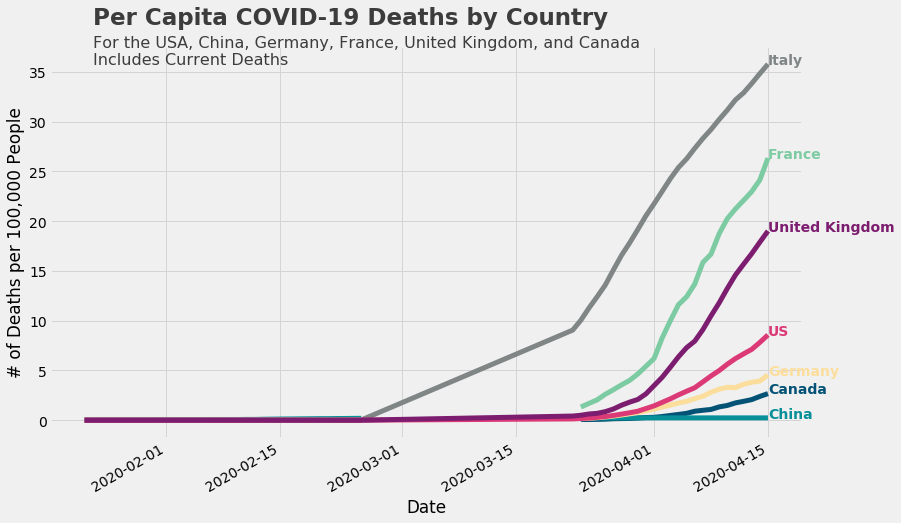

In [32]:
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'Italy', 'China']
# df1 = df1[df1['Country'].isin(countries)]
df1 = df1.pivot(index='covid19.date', columns='covid19.country', values='covid19.deaths')
countries = list(df1.columns)
covid = df1.reset_index('covid19.date')
covid.set_index(['covid19.date'], inplace=True)
covid.columns = countries

percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
    
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Deaths per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')

percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+4, s = "Per Capita COVID-19 Deaths by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max(), s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Deaths", fontsize = 16, alpha = .75)

Text(2020-01-23 00:00:00, 11, 'For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Deaths Percentage per Cases')

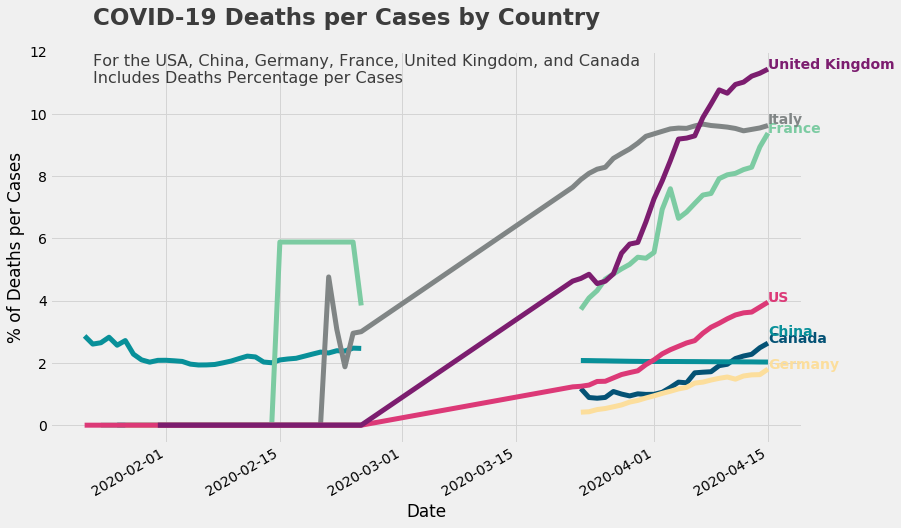

In [33]:
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'Italy', 'China']
df2 = df2[df2['covid19.country'].isin(countries)]

df2['Cases'] = df2[['covid19.confirmed', 'covid19.recovered', 'covid19.deaths']].sum(axis=1)
df2['DeathsCases'] = df2['covid19.deaths'] * 100 / (df2['covid19.confirmed'] + df2['covid19.recovered'] + df2['covid19.deaths'])

df2 = df2.pivot(index='covid19.date', columns='covid19.country', values='DeathsCases')
countries = list(df2.columns)
covid = df2.reset_index('covid19.date')
covid.set_index(['covid19.date'], inplace=True)
covid.columns = countries

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('% of Deaths per Cases')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

plot.text(x = covid.index[1], y = int(covid.max().max())+1, s = "COVID-19 Deaths per Cases by Country\n", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max()), s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Deaths Percentage per Cases", fontsize = 16, alpha = .75)